# **Define problem statement**

In this model I will try to figure out if there is a correlation between GPA and mental health issues

In [ ]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# import data source
students = pd.read_csv("/content/Student Mental health 2.csv")
students.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
students.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [ ]:
students.isnull().sum()


Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [ ]:
students.columns = ['Date_Time', 'Gender', 'Age', 'Course', 'Year', 'CGPA', 'Marital_Status', 'Depression', 'Anxiety', 'Panic_Attack', 'Treatment']
students.head()

,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [ ]:
students.Age.describe()


count    100.00000
mean      20.53000
std        2.49628
min       18.00000
25%       18.00000
50%       19.00000
75%       23.00000
max       24.00000
Name: Age, dtype: float64

In [ ]:
students.Age.isnull().sum()


1

In [ ]:
students.Age.fillna(21, inplace=True)
students.Age.isnull().sum()

0

In [ ]:
#No Missing and Null Values anymore.
students.isnull().sum()

Date_Time         0
Gender            0
Age               0
Course            0
Year              0
CGPA              0
Marital_Status    0
Depression        0
Anxiety           0
Panic_Attack      0
Treatment         0
dtype: int64

In [ ]:
#Formatting the Year column
students['Year'].unique().tolist()

['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2', 'Year 3']

In [ ]:
#Cleaning the year column

def cleanText(text):
    text = text[-1]
    text = int(text)
    return text
students["Year"] = students["Year"].apply(cleanText)
print("First 5 value after Cleaning the text of Year Column")
print(students["Year"][:5], "\n")

First 5 value after Cleaning the text of Year Column
0    1
1    2
2    1
3    3
4    4
Name: Year, dtype: int64 



In [ ]:
students['CGPA'].unique().tolist()


['3.00 - 3.49',
 '3.50 - 4.00',
 '3.50 - 4.00 ',
 '2.50 - 2.99',
 '2.00 - 2.49',
 '0 - 1.99']

In [ ]:
#Cleaning up CGPA Values
def remove_space(delimstrng):
    delimstrng = delimstrng.strip()
    return delimstrng
students["CGPA"] = students["CGPA"].apply(remove_space)
print("First five values of CGPA after cleaning the space from CGPA column:")
print(students["CGPA"][:5], "\n")
print(students['CGPA'].unique().tolist())

First five values of CGPA after cleaning the space from CGPA column:
0    3.00 - 3.49
1    3.00 - 3.49
2    3.00 - 3.49
3    3.00 - 3.49
4    3.00 - 3.49
Name: CGPA, dtype: object 

['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49', '0 - 1.99']


In [ ]:
#New List of Courses with List Count
course_list = students['Course'].unique().tolist()
print(course_list,'\n','\n','Number Of courses -',len(course_list))

['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics', 'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs', 'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science', 'KOE', 'Banking Studies', 'Business Administration', 'Law', 'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA', 'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS', 'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ', 'Biotechnology', 'Communication ', 'Diploma Nursing', 'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ', 'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ', 'Pendidikan Islam'] 
 
 Number Of courses - 49


In [ ]:
#Checking how it looks now

students.head()


,Date_Time,Gender,Age,Course,Year,CGPA,Marital_Status,Depression,Anxiety,Panic_Attack,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No


# **Data Exploration**

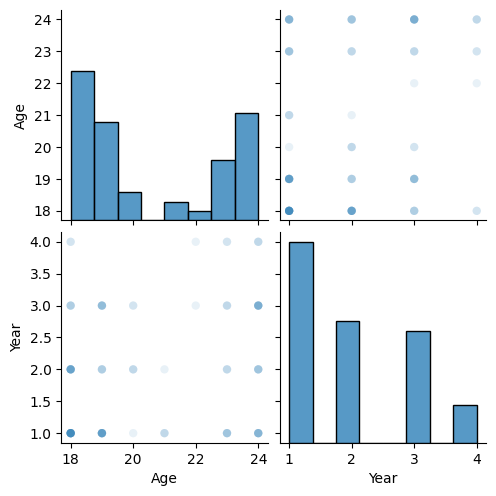

In [ ]:
sns.pairplot(students, plot_kws=dict(alpha=.1, edgecolor='none',))


In [ ]:
course_per_student = students.Course.value_counts()
course_per_student

Course
BCS                        18
Engineering                17
BIT                        10
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                         1
Benl                        1
Kirkhs                      1
Mathemathics                1
Pendidikan islam            1
Hum

<ipython-input-24-bc3a32f83f31>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


Text(0.5, 1.0, 'Student Count for Year 1')

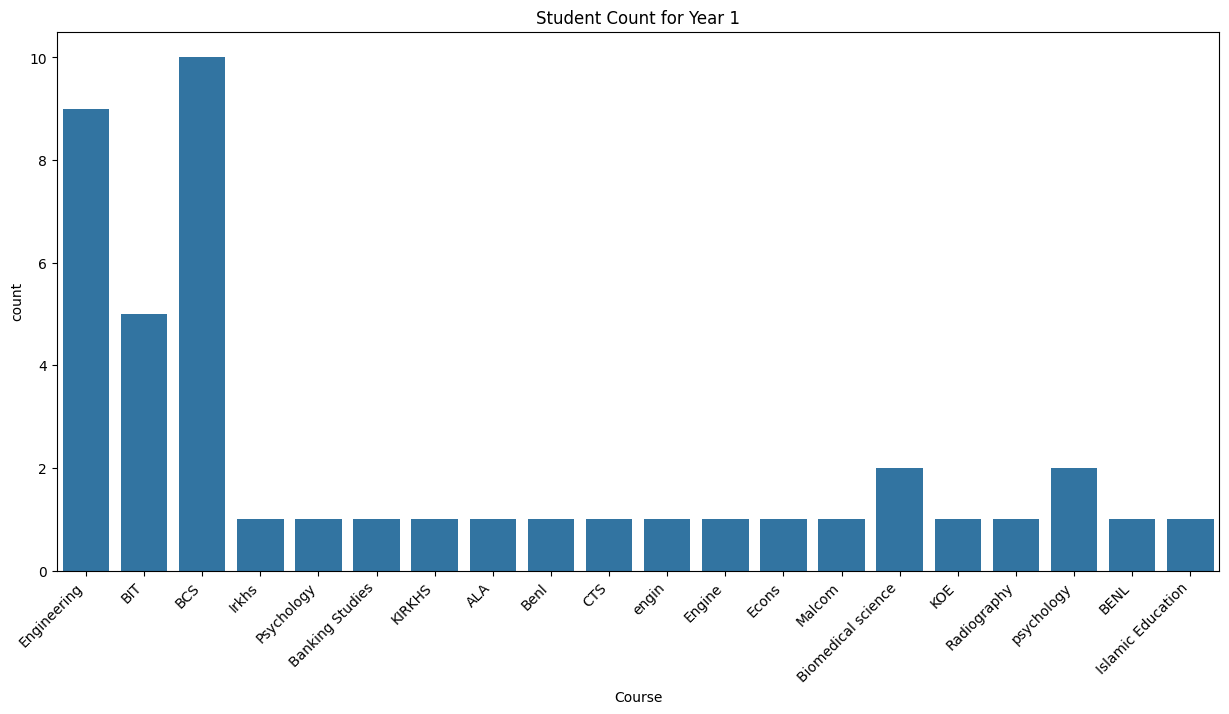

In [ ]:
#Using SNS's plotting for First Year

plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = students[students['Year'] == 1])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_title('Student Count for Year 1')

<ipython-input-25-2b54843e8bf9>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


Text(0.5, 1.0, 'Student Count for Year 2')

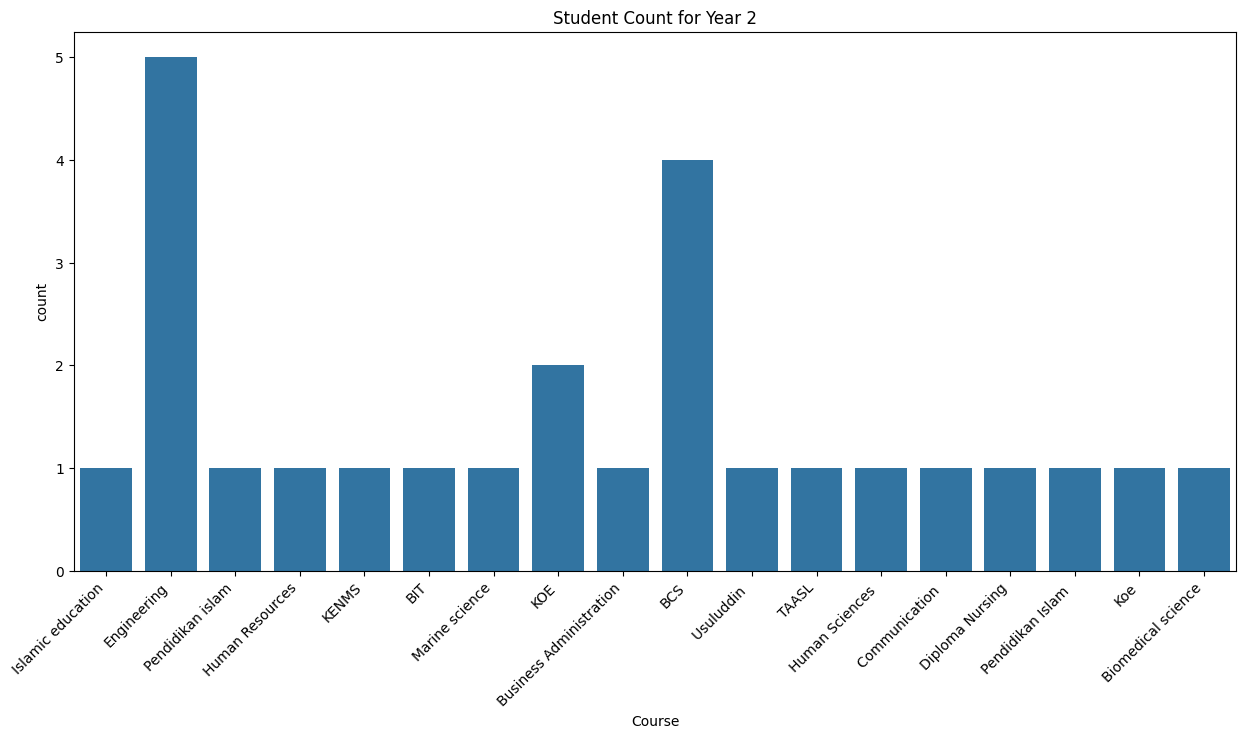

In [ ]:
#Using SNS's plotting  for Second Year

plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = students[students['Year'] == 2])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_title('Student Count for Year 2')

<ipython-input-26-b875e351e747>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


Text(0.5, 1.0, 'Student Count for Year 3')

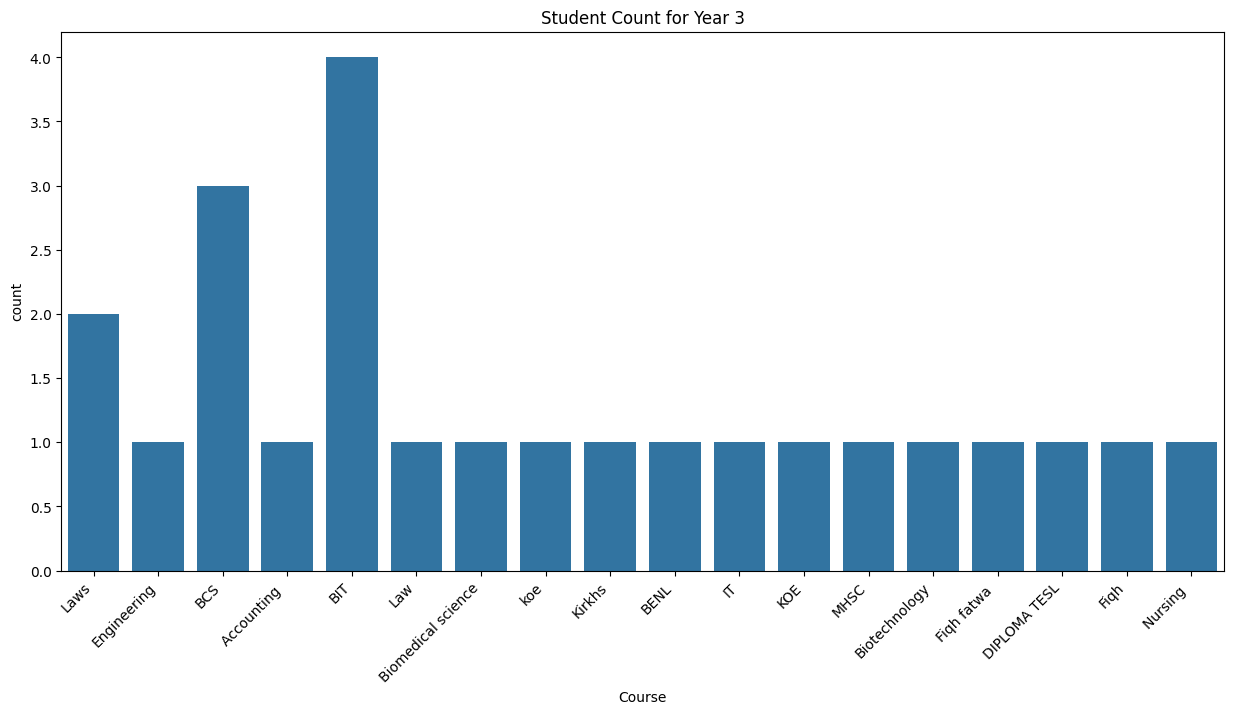

In [ ]:
#Using SNS's plotting for Third Year

plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = students[students['Year'] == 3])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_title('Student Count for Year 3')

<ipython-input-27-f6e62a76c641>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


Text(0.5, 1.0, 'Student Count for Year 4')

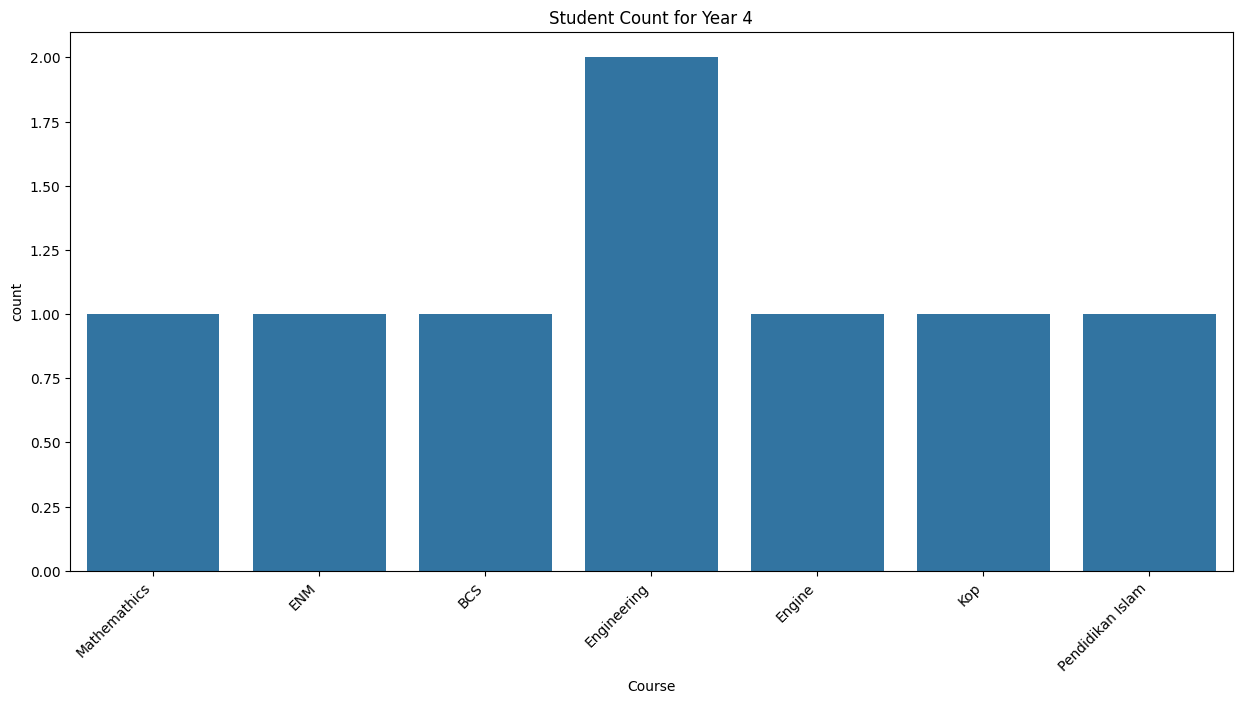

In [ ]:
#Using SNS's plotting for Fourth Year

plt.figure(figsize=(15, 7))
chart = sns.countplot(x = 'Course', data = students[students['Year'] == 4])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
chart.set_title('Student Count for Year 4')

In [ ]:
#Looking at anxiety data

students.Anxiety.value_counts()


Anxiety
No     67
Yes    34
Name: count, dtype: int64

Text(0.5, 1.0, 'Anxiety VS Courses')

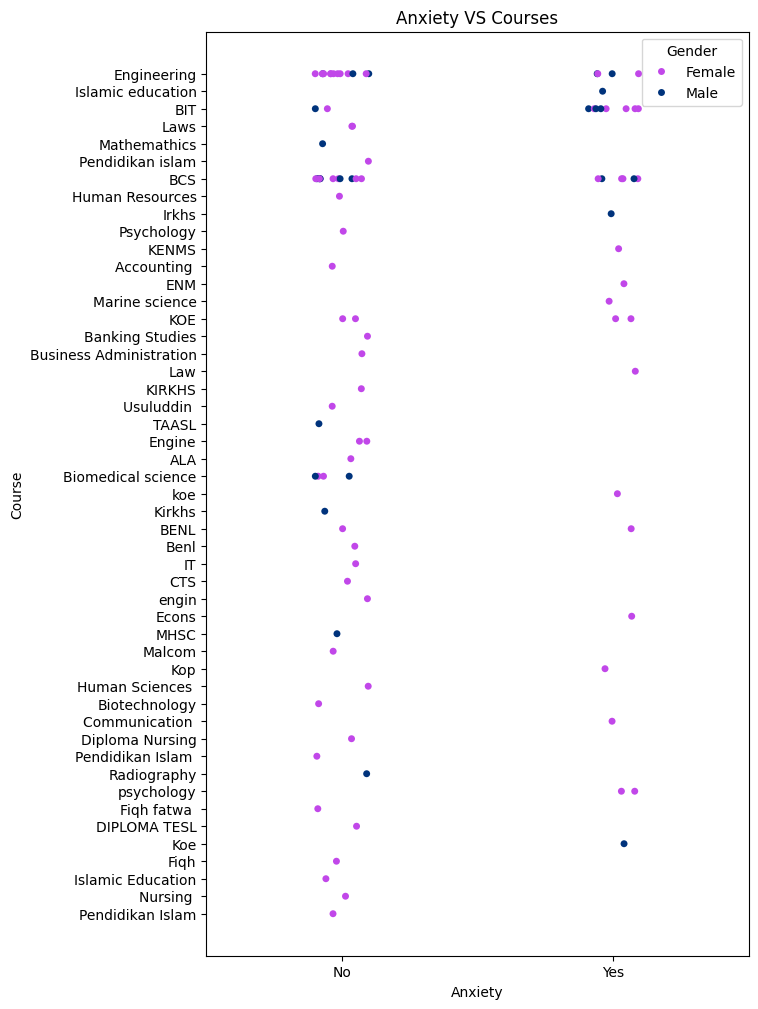

In [ ]:
#Plotting for Anxiety values respective to each courses
plt.figure(figsize=(7, 12))
ax = sns.stripplot(data= students, x = 'Anxiety', y = 'Course', hue = 'Gender',palette = ['#C147E9', '#00337C'])
ax.set_title('Anxiety VS Courses')

In [ ]:
students.Depression.value_counts()


Depression
No     66
Yes    35
Name: count, dtype: int64

Text(0.5, 1.0, 'Depression VS Courses')

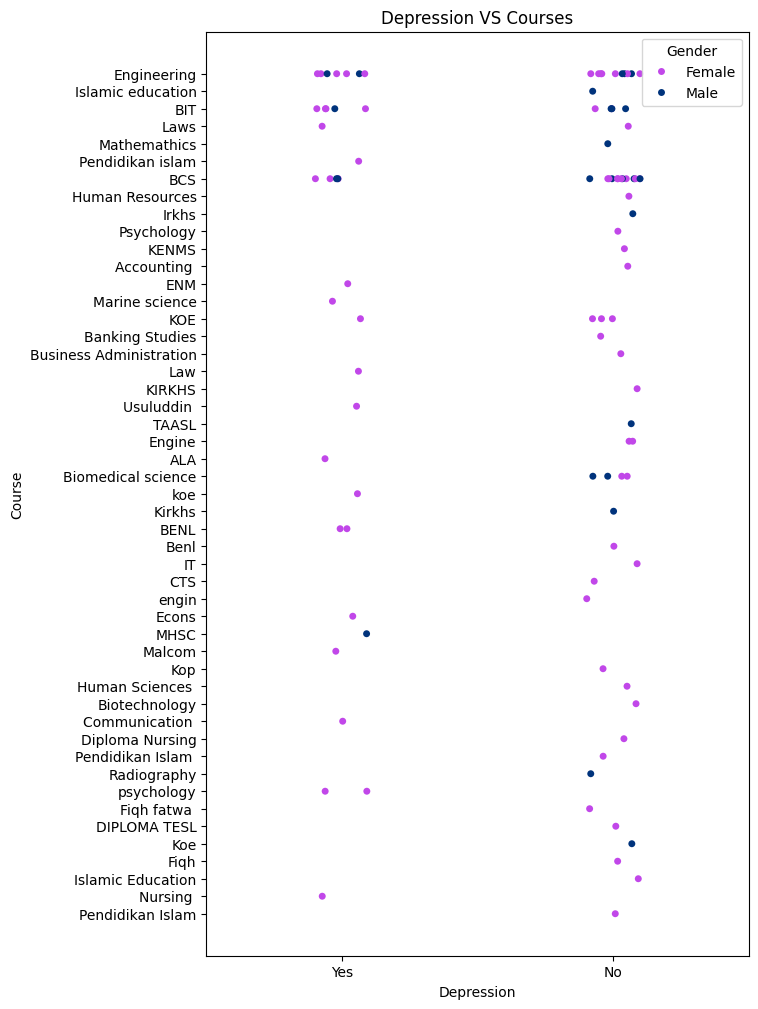

In [ ]:
plt.figure(figsize=(7, 12))
ax = sns.stripplot(data= students, x = 'Depression', y = 'Course', hue = 'Gender',palette = ['#C147E9', '#00337C'])
ax.set_title('Depression VS Courses')

In [ ]:
students.Depression.groupby(students['Gender']).value_counts()


Gender  Depression
Female  No            46
        Yes           29
Male    No            20
        Yes            6
Name: count, dtype: int64

In [ ]:
students.Panic_Attack.value_counts()


Panic_Attack
No     68
Yes    33
Name: count, dtype: int64

Text(0.5, 1.0, 'Panic Attack VS Courses')

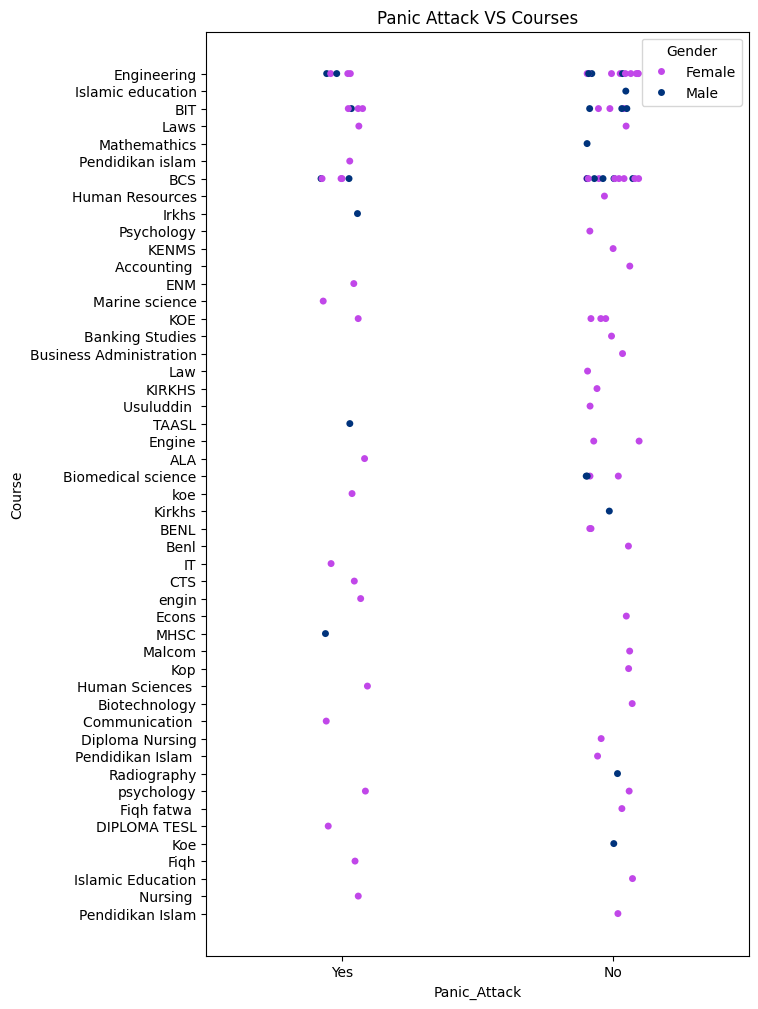

In [ ]:
plt.figure(figsize=(7, 12))
ax = sns.stripplot(data= students, x = 'Panic_Attack', y = 'Course', hue = 'Gender',palette = ['#C147E9', '#00337C'])
ax.set_title('Panic Attack VS Courses')

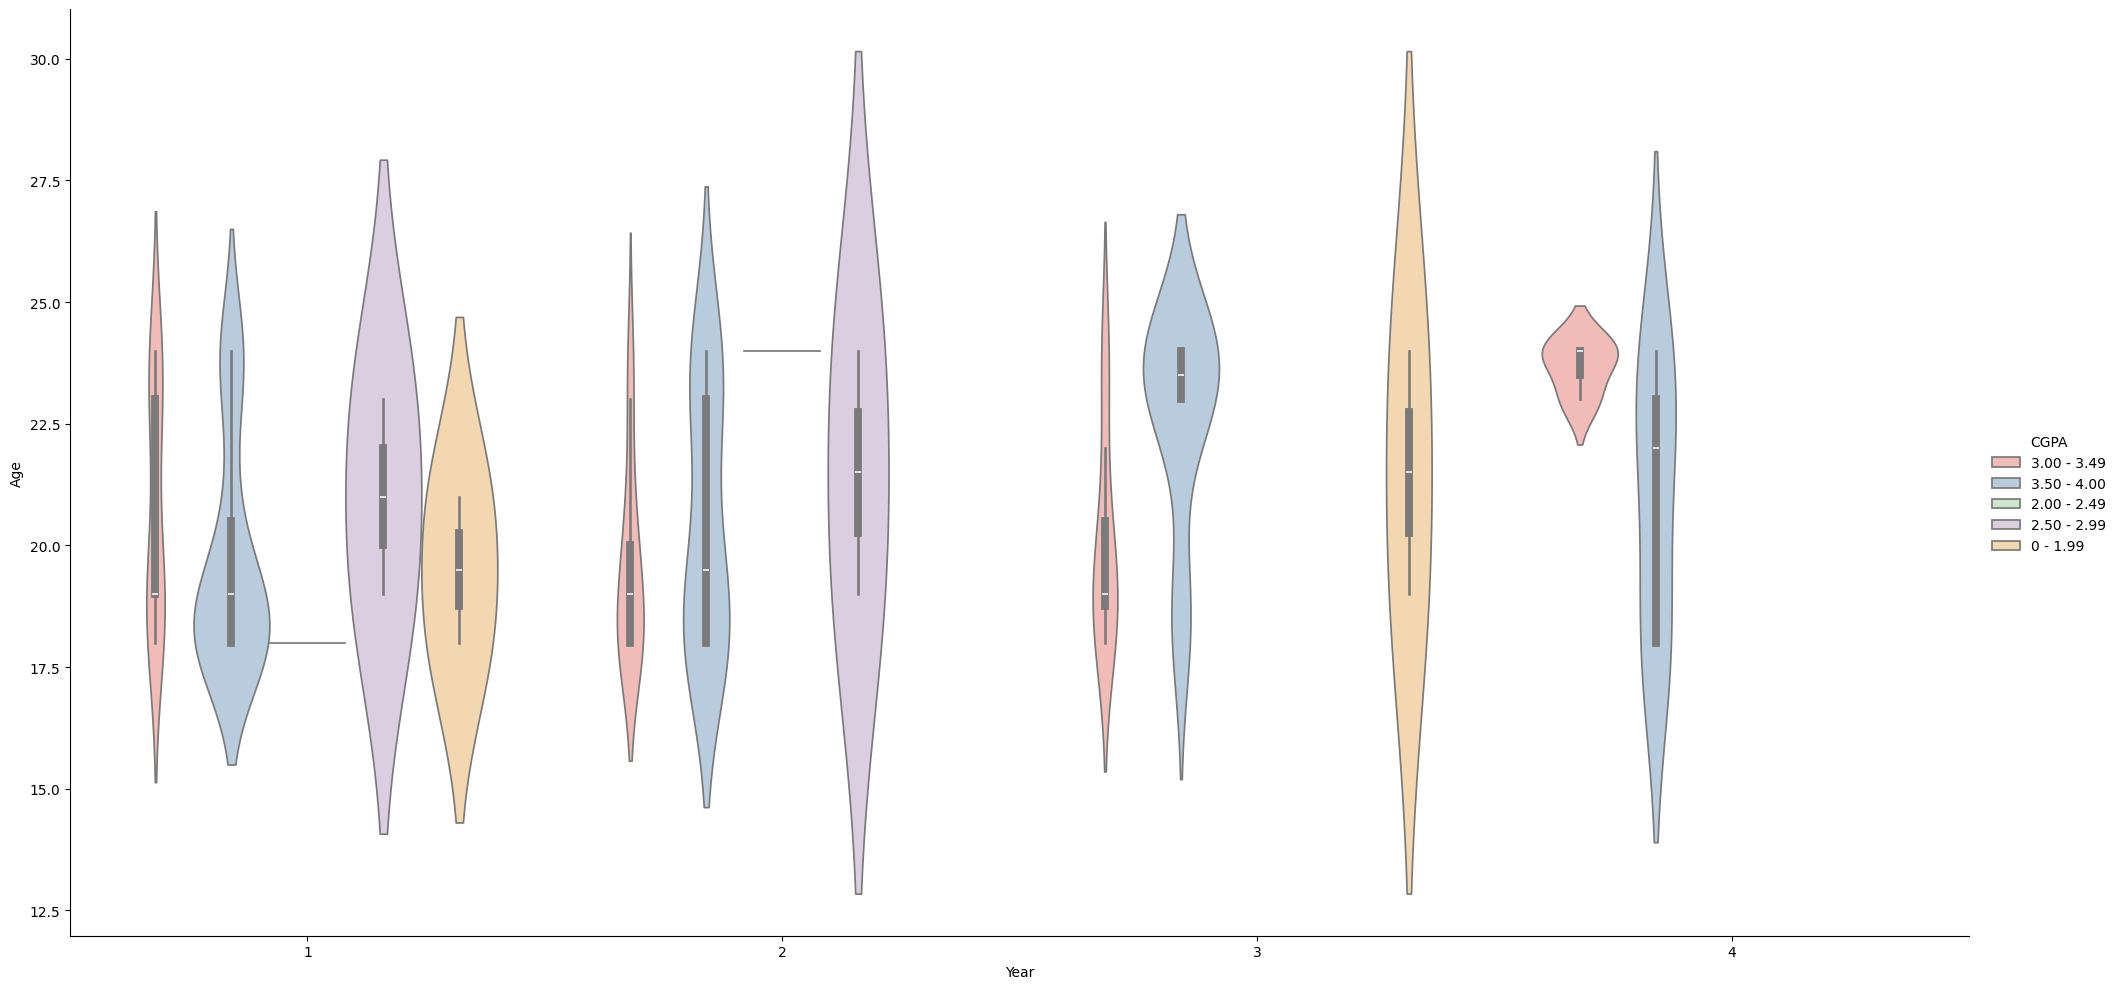

In [ ]:
sns.catplot(data=students, x="Year", y="Age", hue="CGPA", kind="violin", palette="Pastel1",height=10,aspect=2)